<a href="https://colab.research.google.com/github/Praneesh-Sharma/AQI-Prediction/blob/main/AQI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [233]:
# Reading the dataset
df=pd.read_csv('airquality.csv',encoding='unicode_escape',on_bad_lines='skip')

## Data Understanding

In [142]:
# displaying the dataset
df.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151.0,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [143]:
# displaying the number of rows and columns
z=df.shape
print("Number of columns: ", z[0])
print("Number of rows: ", z[1])

Number of columns:  435742
Number of rows:  13


In [144]:
# displaying column names
y=df.columns
print("Columns of the dataset:\n")
for i in y:
  print(i)

Columns of the dataset:

stn_code
sampling_date
state
location
agency
type
so2
no2
rspm
spm
location_monitoring_station
pm2_5
date


In [145]:
# glossary
x=["stn_code = (station code)" , "sampling_date = (date of sample collection)" , "state = (Indian State)" , "location = (location of sample collection)" , "agency type = (type of area)" , "so2 = (sulphur dioxide concentration)" , "no2 = (nitrogen dioxide concentration)" , "rspm = (respirable suspended particualte matter concentration)" , "spm = (suspended particulate matter)" , "location_monitoring_station = (location of the monitoring station)" , "pm2_5 = (particulate matter 2.5)" , "date = (date)"]
for i in x:
  print(i)

stn_code = (station code)
sampling_date = (date of sample collection)
state = (Indian State)
location = (location of sample collection)
agency type = (type of area)
so2 = (sulphur dioxide concentration)
no2 = (nitrogen dioxide concentration)
rspm = (respirable suspended particualte matter concentration)
spm = (suspended particulate matter)
location_monitoring_station = (location of the monitoring station)
pm2_5 = (particulate matter 2.5)
date = (date)


In [146]:
# displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [147]:
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [148]:
# checking for duplicate data
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
435737    False
435738    False
435739    False
435740    False
435741    False
Length: 435742, dtype: bool

In [149]:
# checking for duplicate values
if sum(df.duplicated())==0:
  print("There are no duplicate values.")
else:
  print("Duplicate values exist.")
  print("Number of duplicate values: ", sum(df.duplicated()))

Duplicate values exist.
Number of duplicate values:  674


In [150]:
# locating the missing values
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [151]:
# These are all the unique values present in the dataframe
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

## Data Visualization

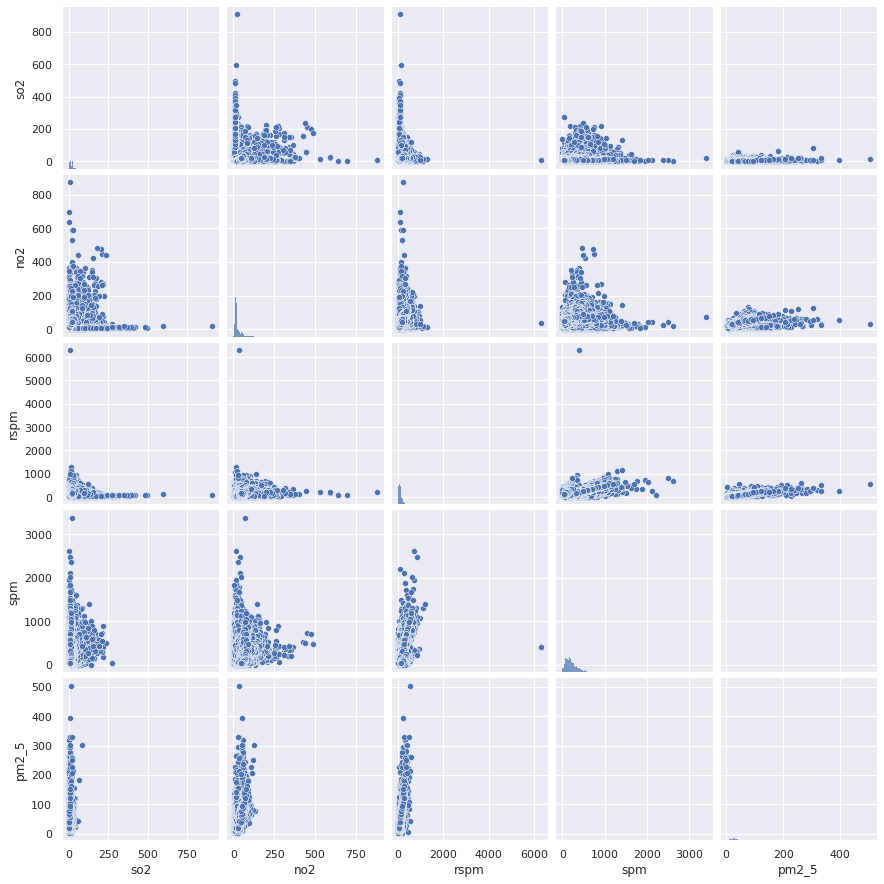

In [152]:
sns.pairplot(data=df)

In [153]:
# Viewing the count of values present in the state column
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

[]

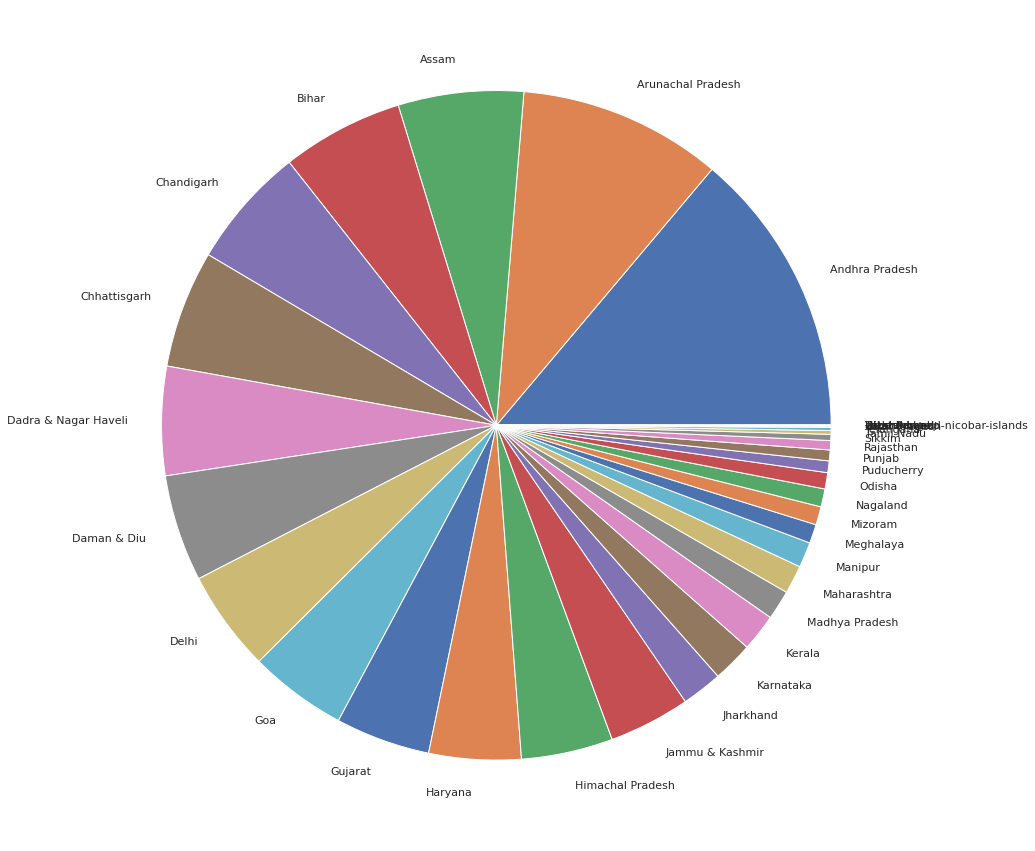

In [158]:
# The visualization shows us the count of states present in the dataset.
plt.figure(figsize=(15, 25))
sns.set_theme(style="darkgrid")
plt.tight_layout()
plt.pie(df['state'].value_counts(), labels = df['state'].unique())
plt.plot()

*Based on the plotted pie graph, it can be seen that Andhra Pradesh has the largest amount of air quality monitoring stations. This means that we have the largest amount of data from the state of Andhra Pradesh.*

In [159]:
# stating the parameters and theme for all the following plots
plt.rcParams['figure.figsize']=(30,10)
sns.set_theme(style="darkgrid")

In [160]:
# Viewing the various locations of pollution ad their frequencies
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

[]

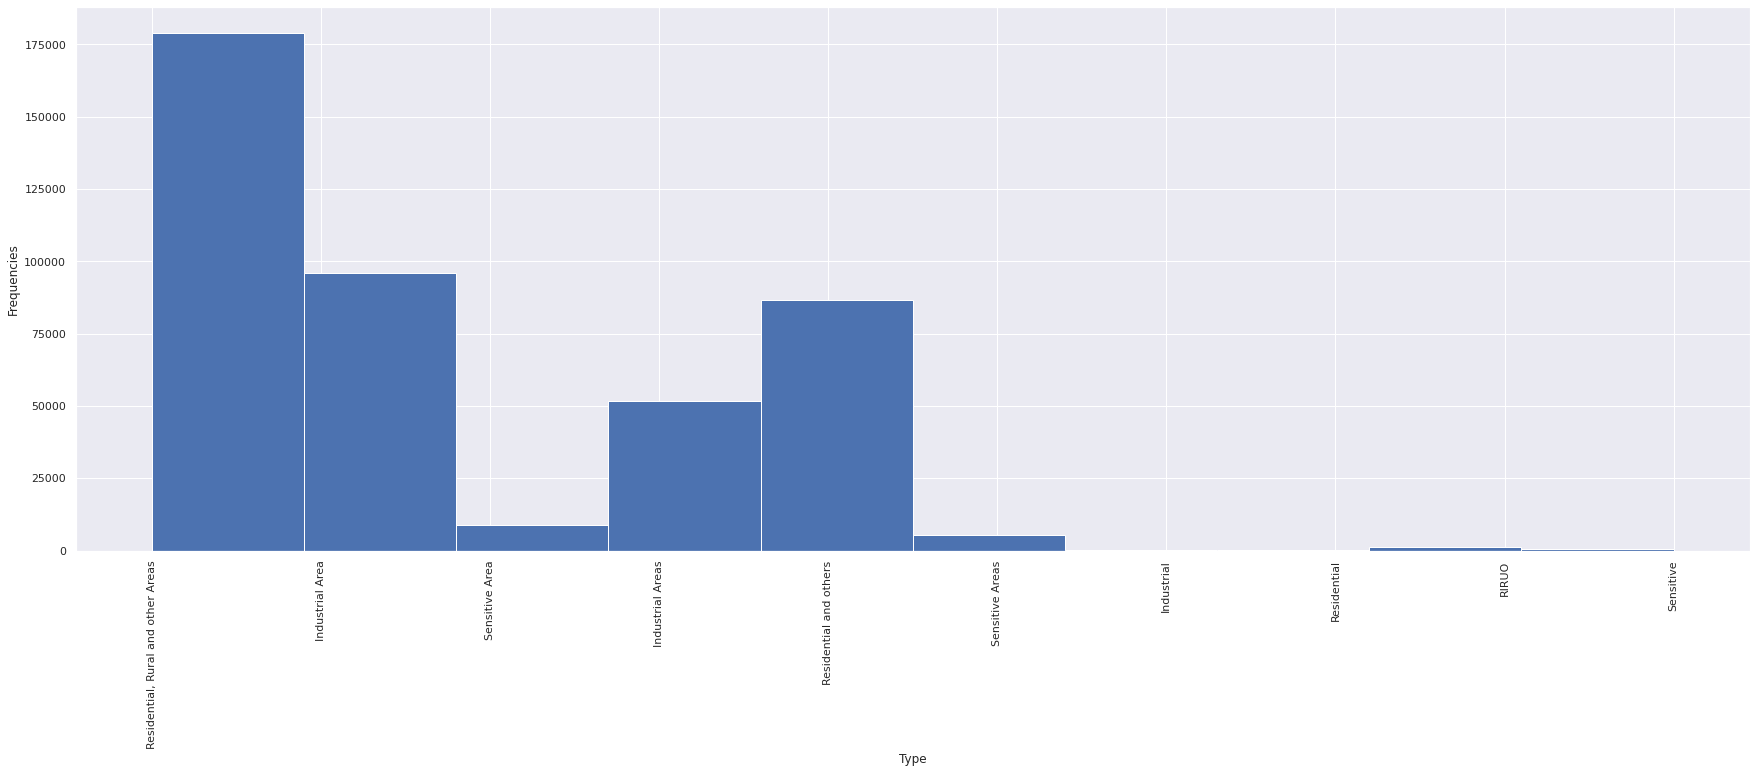

In [161]:
# The visualization shows us the frequency of locations of air pollution
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

*Based on the plotted histogram, it is clearly seen that 'Residential, Rural and other Areas' has the highest amount of AQI, and hence the highest amount of air pollution.*

In [162]:
# Viewing the various agencies working to control the amount of air pollution and their number of offices
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

[]

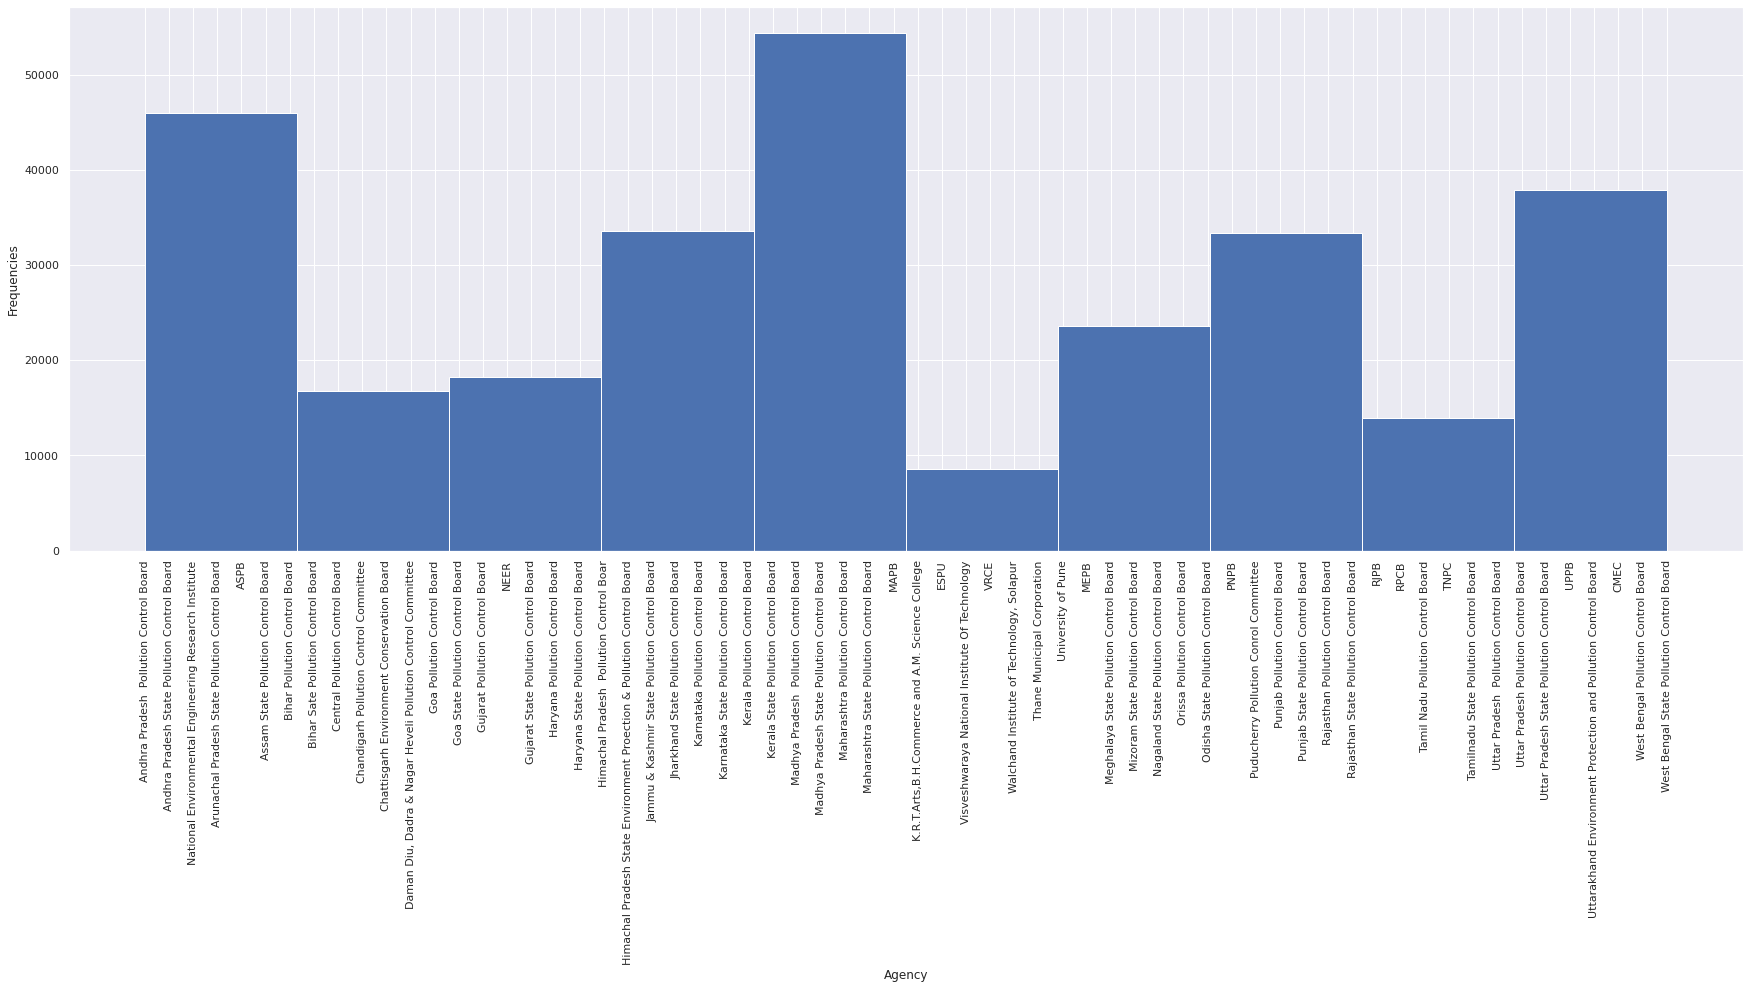

In [163]:
# The visualization shows us the count of Agencies working to control the amount of air pollution and the number of their offices
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()

*Based on the plotted historgram, it is seen that the Pollution Control Board of the Kerala, Madhya Pradesh and Maharastra have the higest number of offices.*

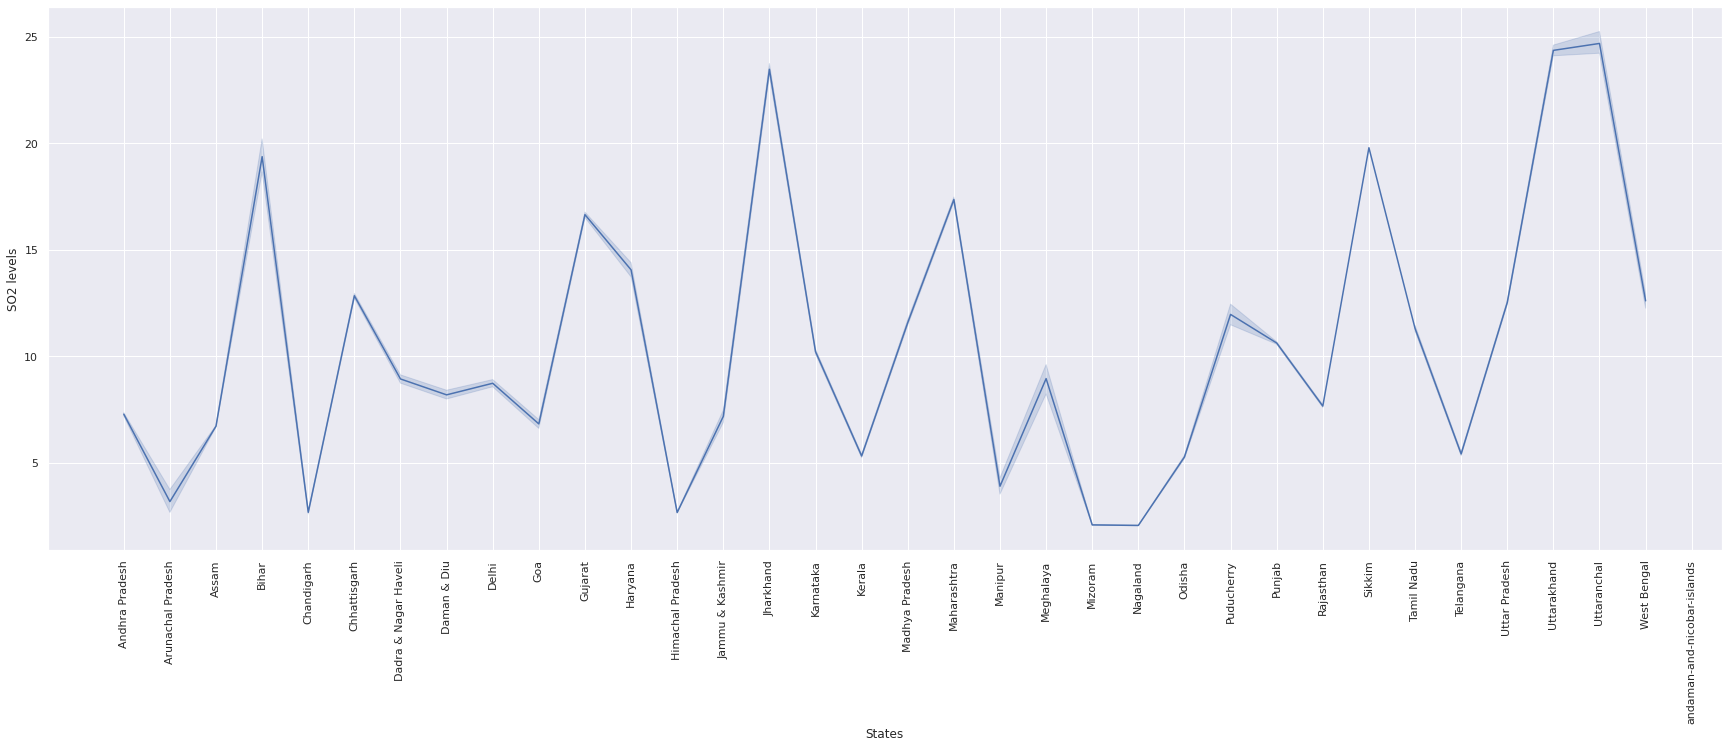

In [164]:
# This visualization shows the name of the state having higher so2 levels in the air
plt.xticks(rotation=90)
sns.lineplot(x='state',y='so2',data=df)
plt.xlabel('States')
plt.ylabel('SO2 levels')
plt.show()

*Based on the plotted line graph, the top 3 states having the higest amount of SO2 in the air are Uttaranchal, Uttrakhand and Jharkhand.*

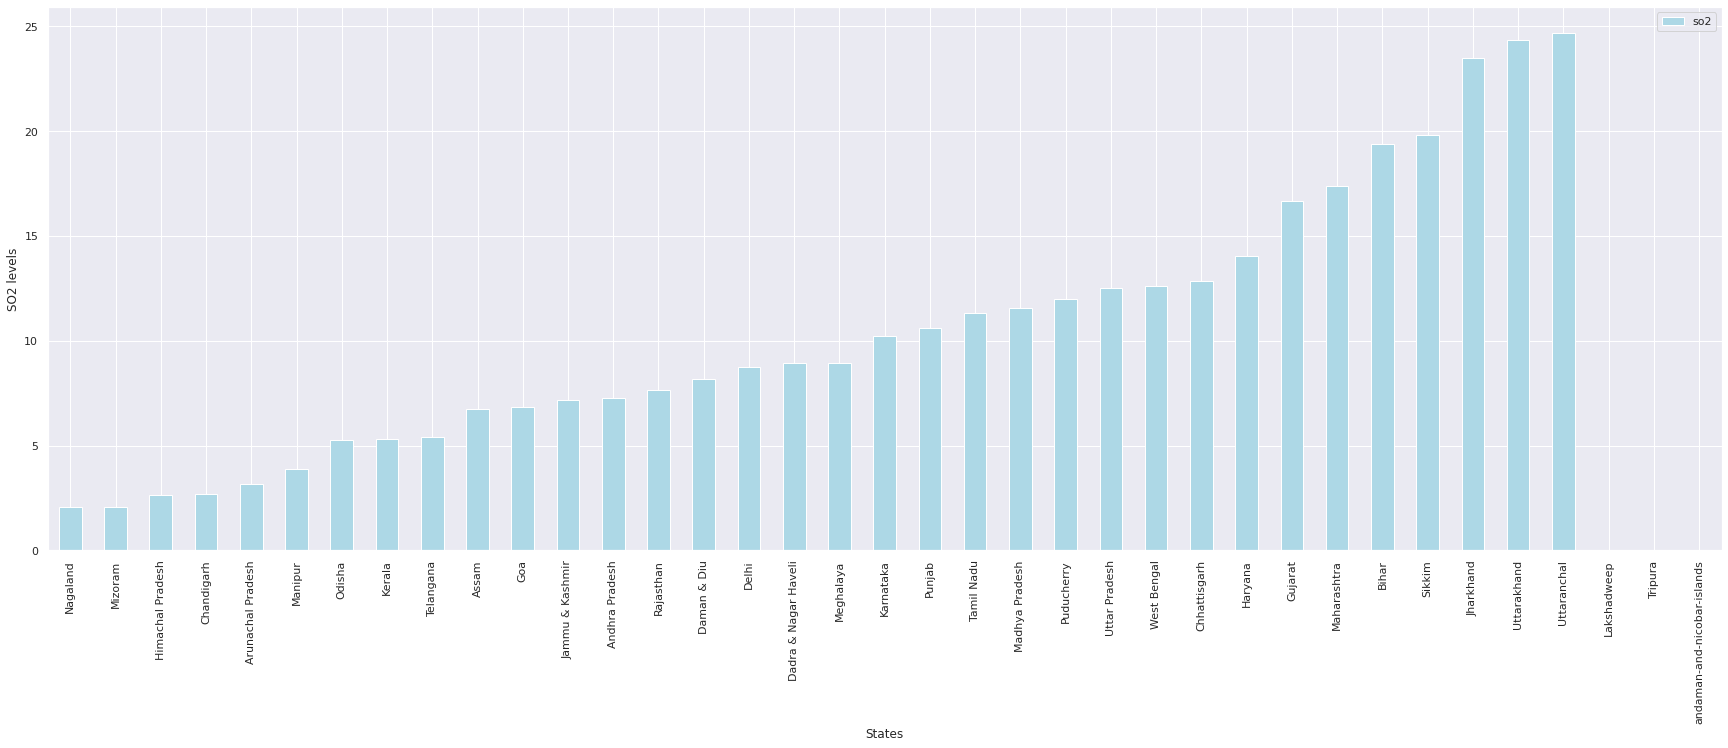

In [165]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='lightblue')
plt.xlabel('States')
plt.ylabel('SO2 levels')
plt.show()

*The above plotted bar graph shows the SO2 levels in states in the ascending order.*

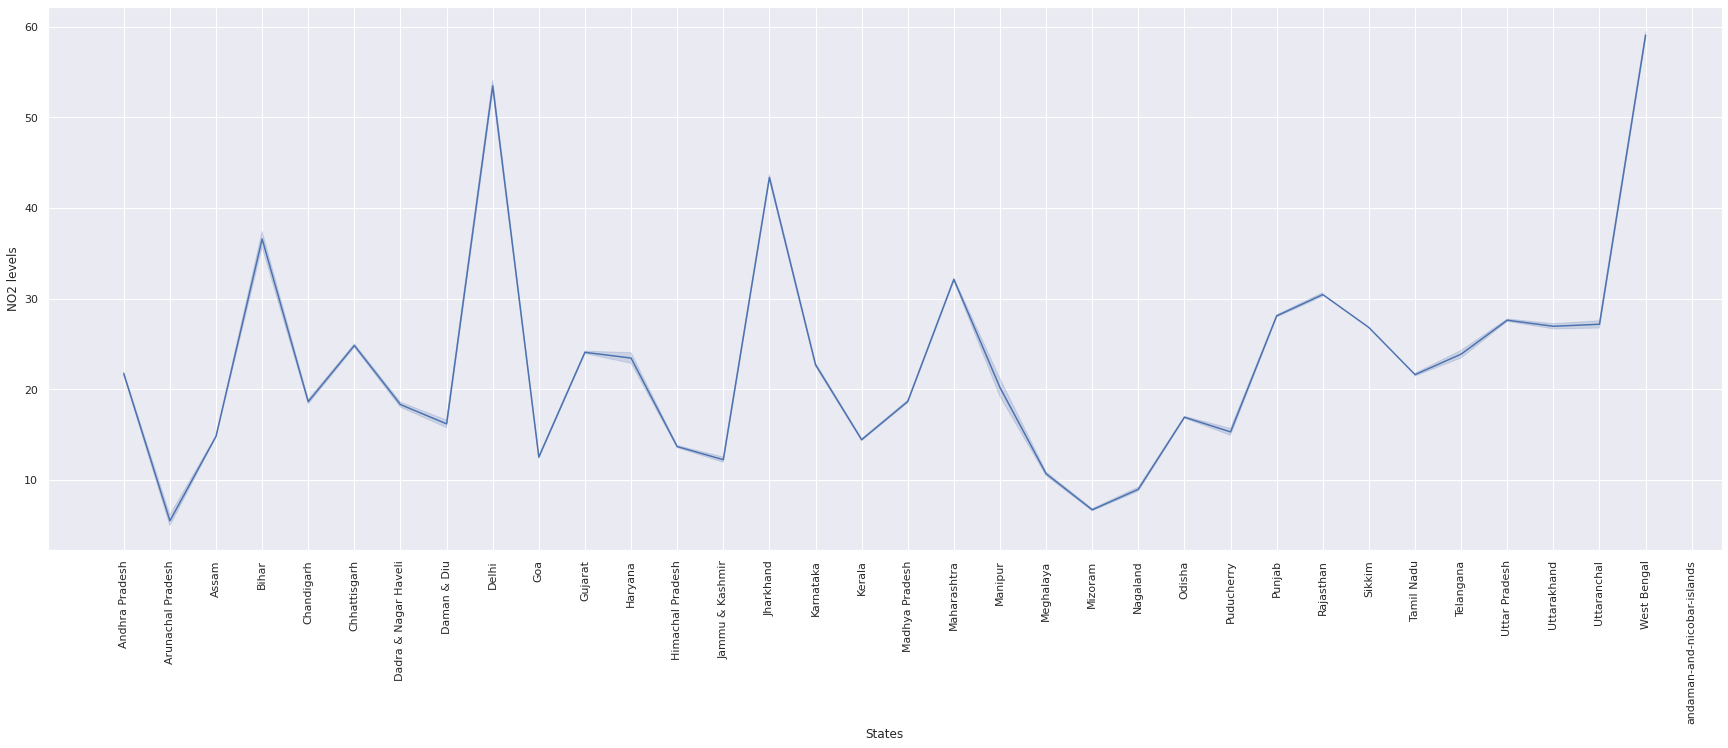

In [166]:
# This visualization shows the name of the state having higher no2 levels in the air
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('NO2 levels')
sns.lineplot(x='state',y='no2',data=df);

*Based on the plotted line graph, the top 3 states having the higest amount of NO2 in the air are West Bengal, Delhi and Jharkhand.*

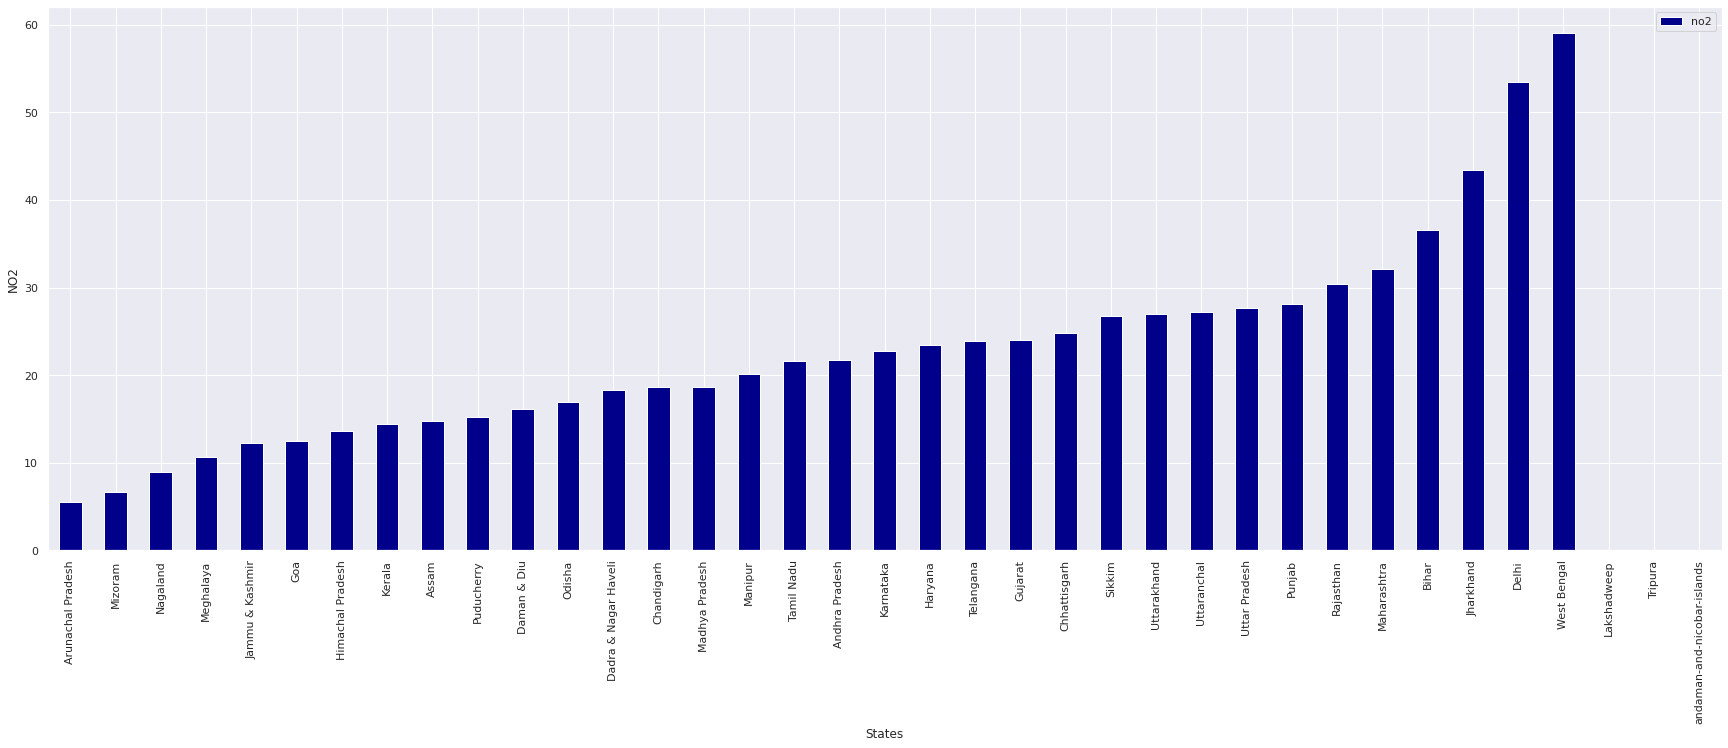

In [167]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='darkblue')
plt.xlabel('States')
plt.ylabel('NO2')
plt.show()

*The above plotted bar graph shows the NO2 levels in states in the ascending order.*

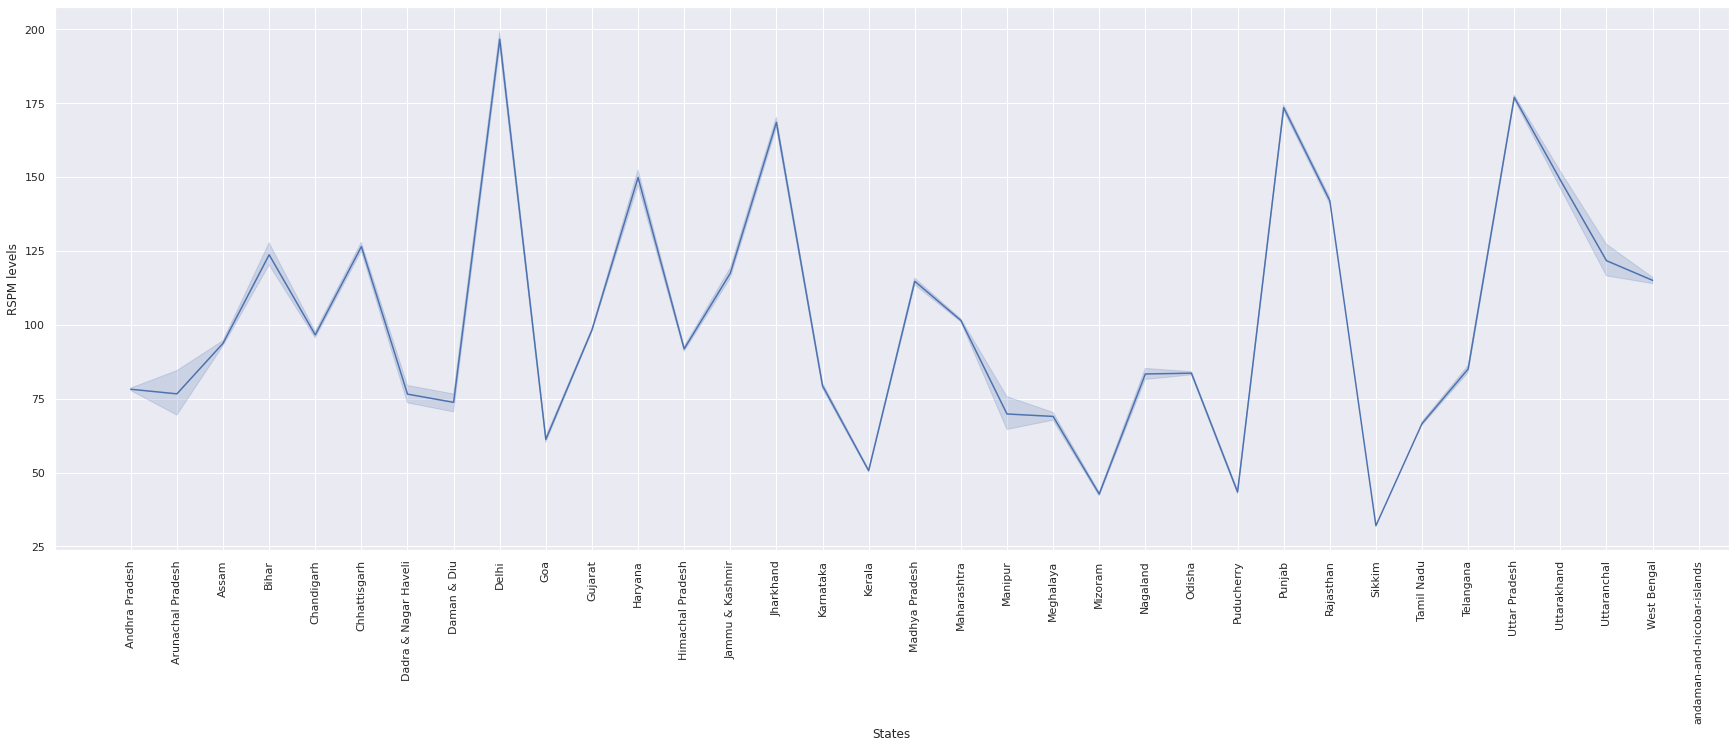

In [168]:
# This visualization shows the name of the state having higher rspm levels in the air
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('RSPM levels')
sns.lineplot(x='state',y='rspm',data=df);

*Based on the plotted line graph, the top 3 states having the higest amount of NO2 in the air are Delhi, Uttar Pradesh and Punjab.*

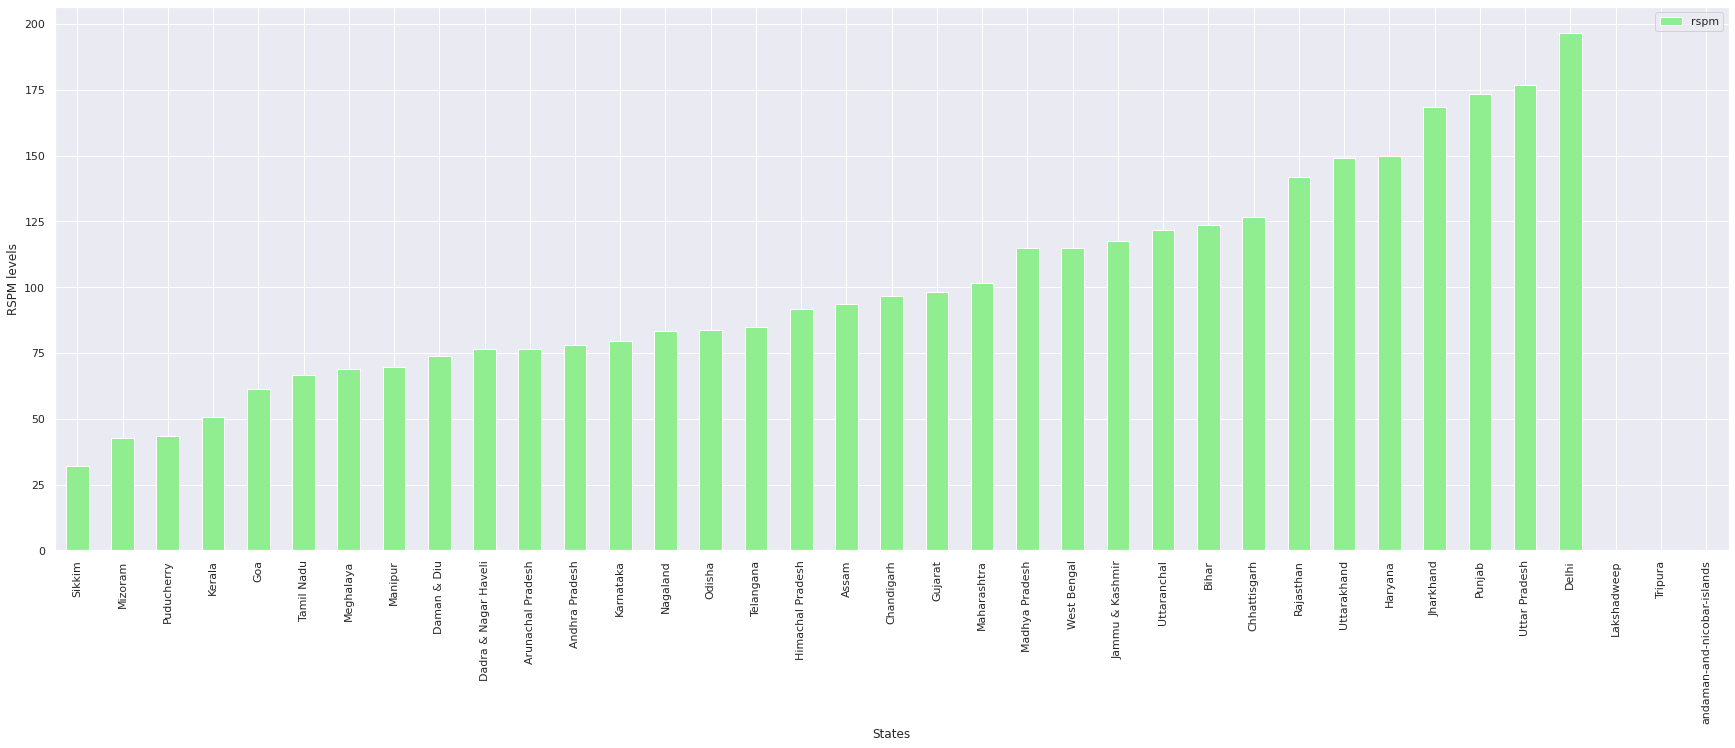

In [169]:
df[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm').plot.bar(color='lightgreen')
plt.xlabel('States')
plt.ylabel('RSPM levels')
plt.show()

*The above plotted bar graph shows the RSPM levels in states in the ascending order.*

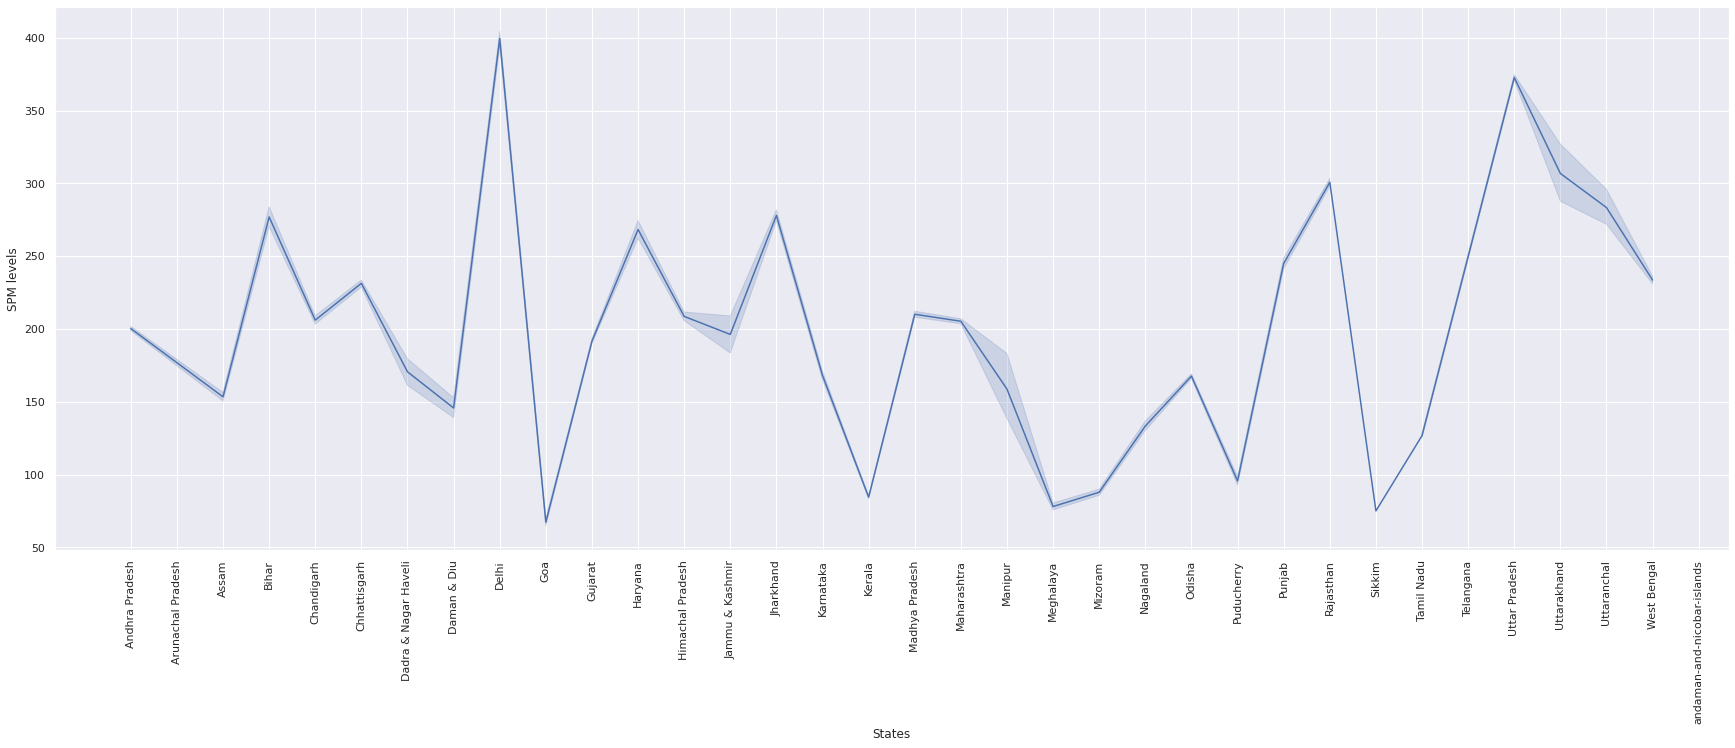

In [170]:
# This visualization shows the name of the state having higher spm levels in the air
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('SPM levels')
sns.lineplot(x='state',y='spm',data=df);

*Based on the plotted line graph, the top 3 states having the higest amount of NO2 in the air are Delhi, Uttar Pradesh and Rajasthan.*

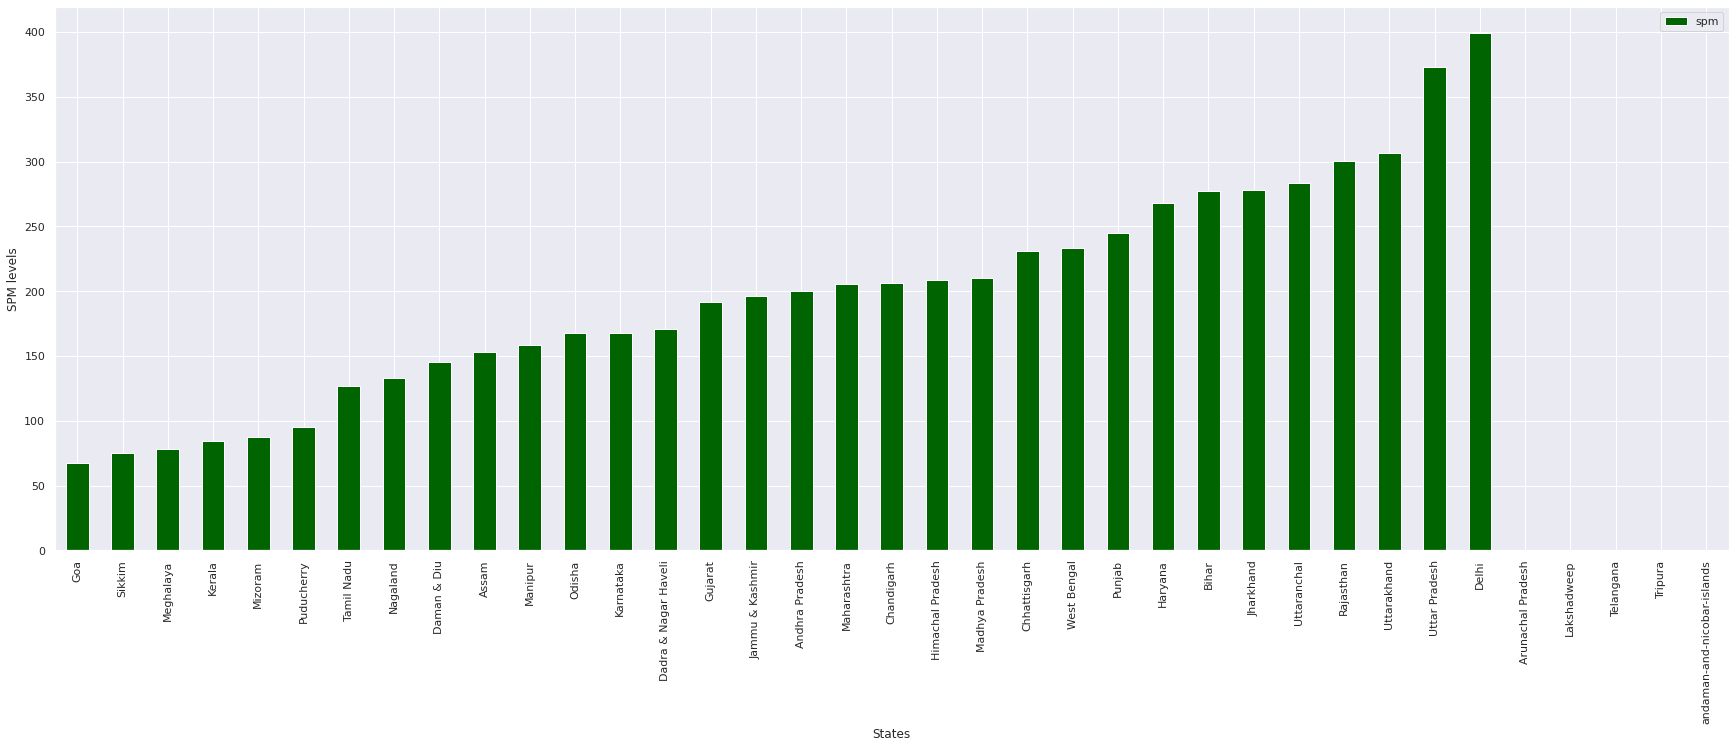

In [171]:
df[['spm','state']].groupby(["state"]).mean().sort_values(by='spm').plot.bar(color='darkgreen')
plt.xlabel('States')
plt.ylabel('SPM levels')
plt.show()

*The above plotted bar graph shows the SPM levels in states in the ascending order.*

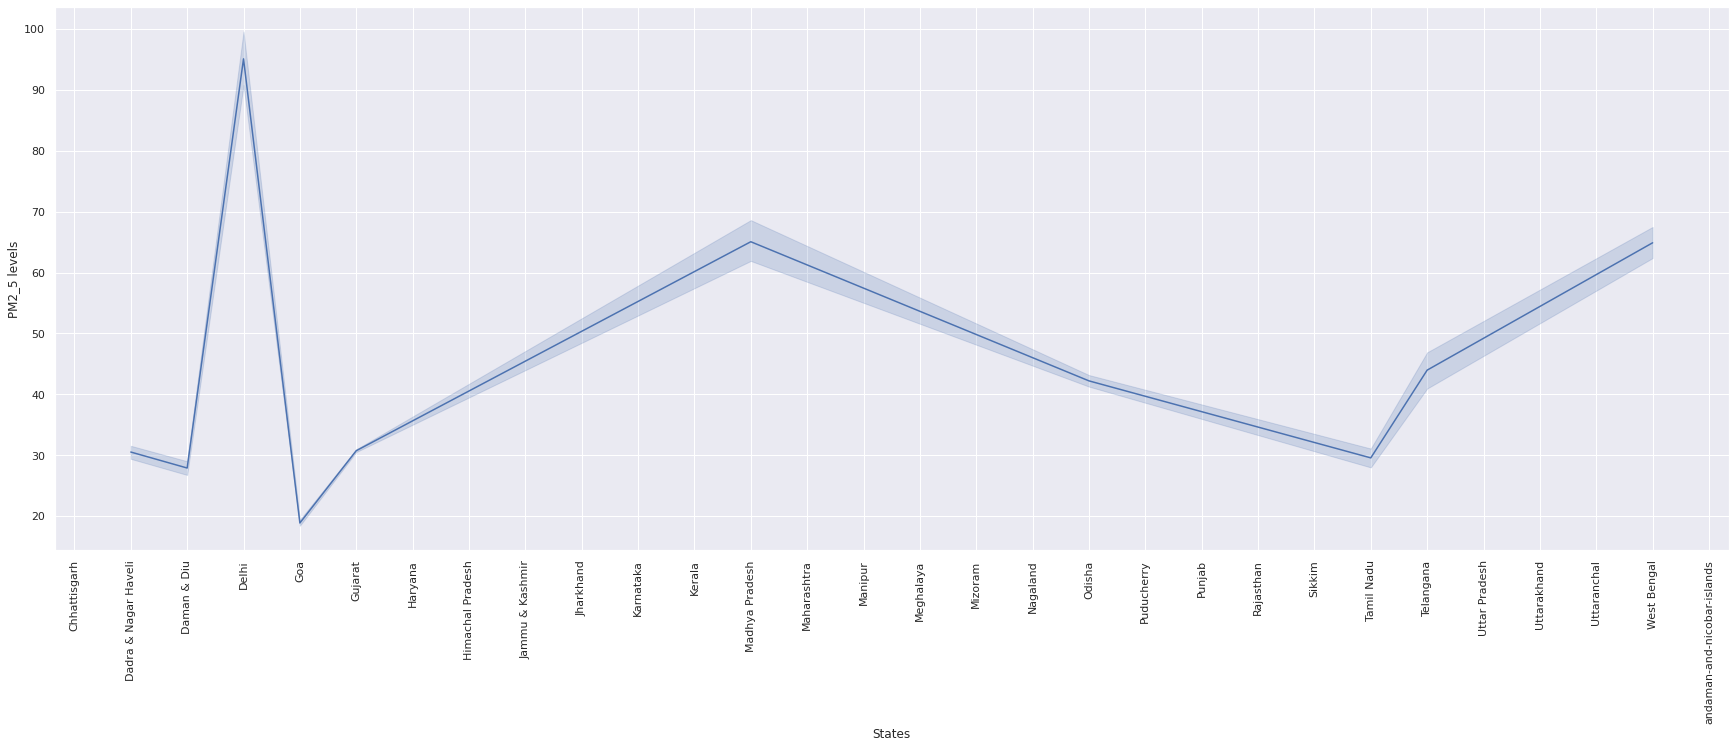

In [172]:
# This visualization shows the name of the state having higher pm2_5 levels in the air
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('PM2_5 levels')
sns.lineplot(x='state',y='pm2_5',data=df);

*Based on the plotted line graph, the top 3 states having the higest amount of NO2 in the air are Delhi, Madhya Pradesh and West Bengal.*

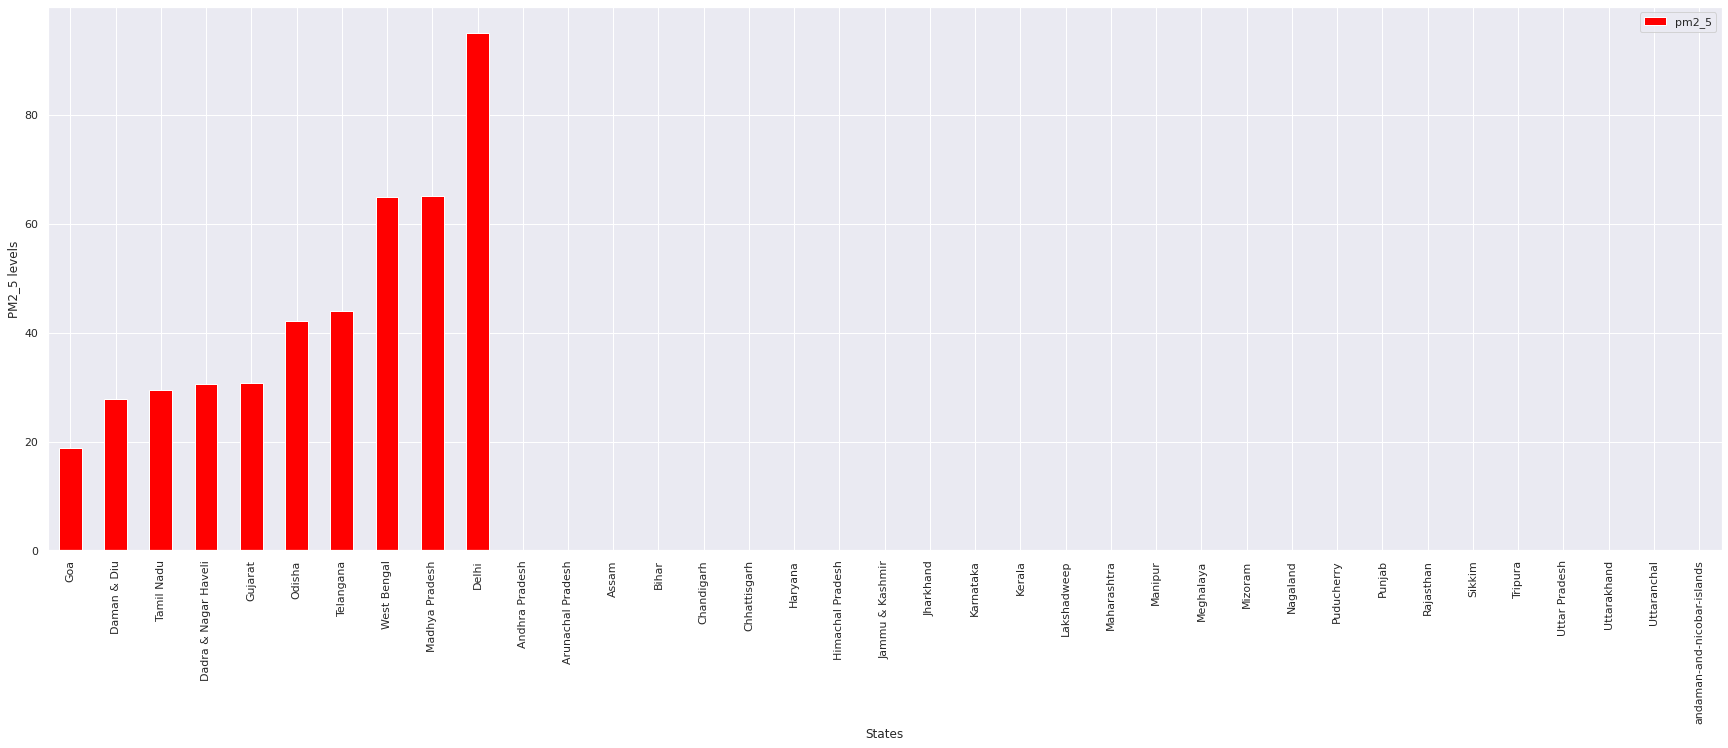

In [173]:
df[['pm2_5','state']].groupby(["state"]).mean().sort_values(by='pm2_5').plot.bar(color='red')
plt.xlabel('States')
plt.ylabel('PM2_5 levels')
plt.show()

*The above plotted bar graph shows the PM2_5 levels in states in the ascending order.*

[]

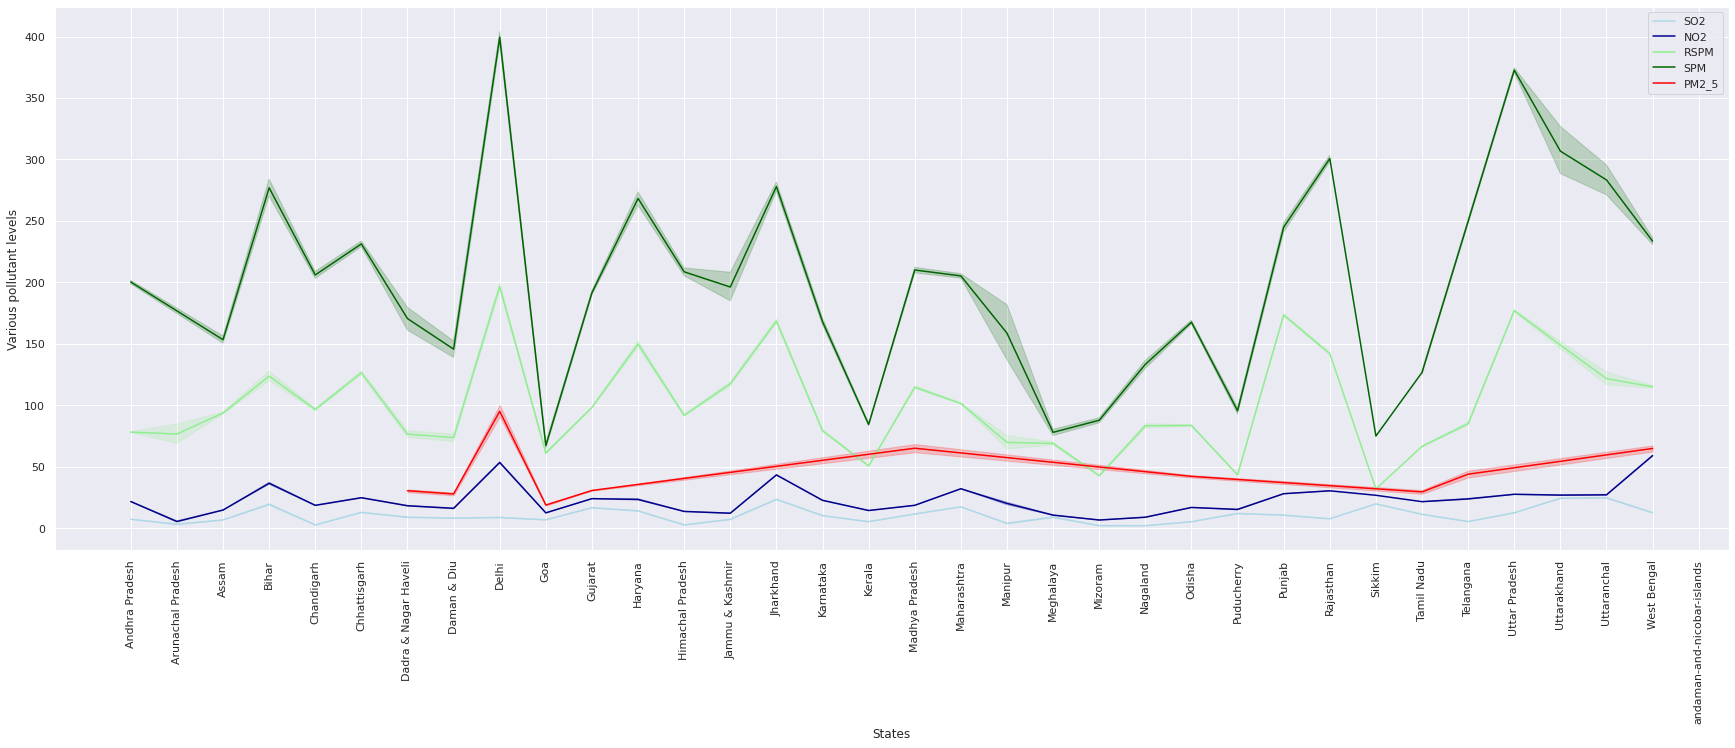

In [174]:
# This visualization shows the states and the levels of various pollutants in the air
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Various pollutant levels')
sns.lineplot(x='state',y='so2',data=df, color='lightblue', label= 'SO2')
sns.lineplot(x='state',y='no2',data=df, color='darkblue', label= 'NO2')
sns.lineplot(x='state',y='rspm',data=df, color='lightgreen', label= 'RSPM')
sns.lineplot(x='state',y='spm',data=df, color='darkgreen', label= 'SPM')
sns.lineplot(x='state',y='pm2_5',data=df, color='red', label= 'PM2_5')
plt.plot()

*The graph plotted above shows the states and the amount on different air pollutants in them.*

## Treating the Null values.

In [234]:
# Dropping unnecessary columns
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [235]:
# checking for the null values in the dataset
print(df.isnull().sum().sort_values(ascending=False))

pm2_5       426428
spm         237387
rspm         40222
so2          34646
no2          16233
type          5393
location         3
state            0
dtype: int64


In [236]:
# Null value Imputation for categorical data
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [237]:
# null values are replaced with zeros for the numerical data
df.fillna(0, inplace=True)

In [238]:
# successfully imputed null values which were present in the dataset
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [239]:
# cleaned dataset
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0


# Calculation of AQI

In [240]:
# calculation of the individual pollutant index for SO2(sulphur dioxide)
def cal_SOi(so2):
    a=0
    if (so2<=40):
     a= so2*(100/80)
    elif (so2>40 and so2<=80):
     a= 50+(so2-40)*(100/80)
    elif (so2>80 and so2<=380):
     a= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     a= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     a= 300+(so2-800)*(100/800)
    elif (so2>1600):
     a= 400+(so2-1600)*(100/800)
    return a
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [241]:
# calculattion of the individual pollutant index for NO2(nitrogen dioxide)
def cal_Noi(no2):
    b=0
    if(no2<=40):
     b= no2*100/80
    elif(no2>40 and no2<=80):
     b= 50+(no2-40)*(100/80)
    elif(no2>80 and no2<=180):
     b= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     b= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     b= 300+(no2-280)*(100/120)
    else:
     b= 400+(no2-400)*(100/120)
    return b
df['NOi']=df['no2'].apply(cal_Noi)
data= df[['no2','NOi']]
data.head()

,no2,NOi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [242]:
# Caluclating the Air Quality Index.
def cal_aqi(si,ni):
    aqi=0
    if(si>ni):
     aqi=si
    else:
      aqi=ni
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['NOi']),axis=1)
data= df[['state','SOi','NOi','AQI']]
data.head()

,state,SOi,NOi,AQI
0,Andhra Pradesh,6.000,21.750,21.750
1,Andhra Pradesh,3.875,8.750,8.750
2,Andhra Pradesh,7.750,35.625,35.625
3,Andhra Pradesh,7.875,18.375,18.375
4,Andhra Pradesh,5.875,9.375,9.375


# ML

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [263]:
X=df[['SOi','NOi']]
X.head()

,SOi,NOi
0,6.000,21.750
1,3.875,8.750
2,7.750,35.625
3,7.875,18.375
4,5.875,9.375


In [264]:
Y=df['AQI']
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [265]:
# splitting the data into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(348593, 2) (87149, 2) (348593,) (87149,)


# Linear Regression

In [266]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [267]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [268]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print("\n")
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  4.081061956748004
RMSE TestData =  4.198067518008159


RSquared value on train: 0.9684827385399858
RSquared value on test: 0.9662923467618503


In [269]:
print("The accuracy of this model is: ", (model.score(X_test,Y_test))*100)

The accuracy of this model is:  96.62923467618502


# Decision Tree

In [270]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [271]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [273]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print("\n")
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  9.852819964435943e-16
RMSE TestData =  0.1366491125442084


RSquared value on train: 1.0
RSquared value on test: 0.9999642856039457


In [274]:
print("The accuracy of this model is: ", (DT.score(X_test,Y_test))*100)

The accuracy of this model is:  99.99642856039456


Made by:

*   PRANEESH SHARMA
*   21052264
*   Kalinga Institute Of Technology

